<a href="https://colab.research.google.com/github/egagiilang/BIGDATA/blob/master/PROSES_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Instalasi Spark pada Google Colab**

In [21]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark


In [22]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

# **2. Import library Spark yang sudah diinstal**

In [23]:
import findspark
findspark.init("spark-3.0.0-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [24]:
!pip install -q pyspark_dist_explore

In [ ]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

# **3. Inisialisasi SparkContext dan SparkSession**

In [25]:
sc = spark.sparkContext
spark = SparkSession(sc)

# **4. Load Dataset**

In [26]:
WorldCupMatches_df = spark.read.csv("WorldCupMatches.csv", header=True, inferSchema=True)
WorldCupMatches_df.printSchema() 

root
 |-- Year: integer (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Stadium: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Home Team Name: string (nullable = true)
 |-- Home Team Goals: integer (nullable = true)
 |-- Away Team Goals: integer (nullable = true)
 |-- Away Team Name: string (nullable = true)
 |-- Win conditions: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Half-time Home Goals: integer (nullable = true)
 |-- Half-time Away Goals: integer (nullable = true)
 |-- Referee: string (nullable = true)
 |-- Assistant 1: string (nullable = true)
 |-- Assistant 2: string (nullable = true)
 |-- RoundID: integer (nullable = true)
 |-- MatchID: integer (nullable = true)
 |-- Home Team Initials: string (nullable = true)
 |-- Away Team Initials: string (nullable = true)



# **5. Proses EDA**

In [27]:
print("Jumlah pertandingan yang terjadi :")
WorldCupMatches_df.count()

Jumlah pertandingan yang terjadi :


852

In [28]:
WorldCupMatches_df.select('Year').describe().show()

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|               852|
|   mean|1985.0892018779343|
| stddev|22.448824702021138|
|    min|              1930|
|    max|              2014|
+-------+------------------+



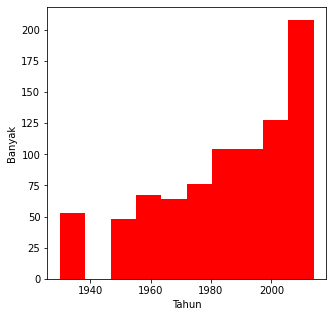

In [31]:
WorldCupMatches_df_year = WorldCupMatches_df.select('Year')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, WorldCupMatches_df_year, color="red")
plt.xlabel('Tahun')
plt.ylabel('Banyak')

plt.show()

In [32]:
print("Jumlah total pertandingan(tahun) dengan kolom tahun kosong(null):")
WorldCupMatches_df.where(col("Year").isNull()).count()

Jumlah total pertandingan(tahun) dengan kolom tahun kosong(null):


0

# **6. Pre-processing Data**

In [33]:
WorldCupMatches_df.select('Year').describe().show()

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|               852|
|   mean|1985.0892018779343|
| stddev|22.448824702021138|
|    min|              1930|
|    max|              2014|
+-------+------------------+



In [ ]:
WorldCupMatches_df.coalesce(1).write.csv("WorldCupMatches_processed", header=True)

In [ ]:
spark.stop() 